In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing   #for encoding
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [2]:
dummy_df = pd.read_csv(r"C:\Users\rijul\Learnbay\ML Projects By Mithlesh\Projects dataset to do\Component failure\component_failure_prediction.csv")  
temp = dummy_df.columns.values                                                          
temp

array(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'], dtype=object)

In [3]:
dummy_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
dummy_df.apply(lambda x: x.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
print("Here's the dimensions of our data frame:\n", dummy_df.shape)
print("Here's the data types of our columns:\n",dummy_df.dtypes)

Here's the dimensions of our data frame:
 (10000, 10)
Here's the data types of our columns:
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object


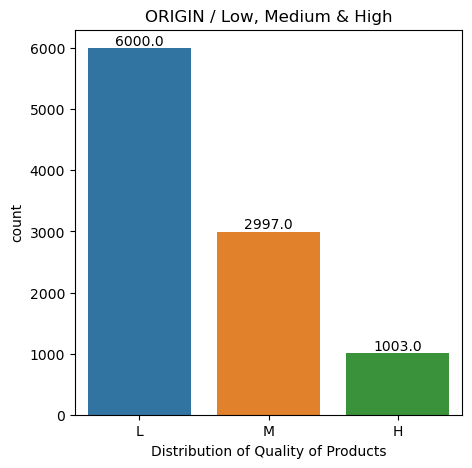

In [6]:
order = dummy_df['Type'].value_counts().index

plt.figure(figsize=(5, 5))
ax = sns.countplot(x="Type", data=dummy_df, order=order)
plt.xlabel("Distribution of Quality of Products")
plt.title("ORIGIN / Low, Medium & High")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

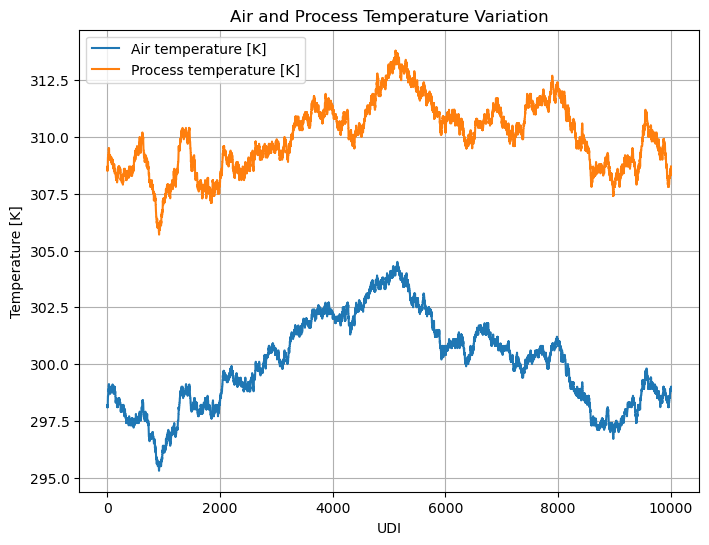

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(dummy_df['UDI'], dummy_df['Air temperature [K]'], linestyle='-', label='Air temperature [K]')
plt.plot(dummy_df['UDI'], dummy_df['Process temperature [K]'], linestyle='-', label='Process temperature [K]')
plt.xlabel('UDI')
plt.ylabel('Temperature [K]')
plt.title('Air and Process Temperature Variation')
plt.legend()  # Show legend with labels
plt.grid(True)
plt.show()

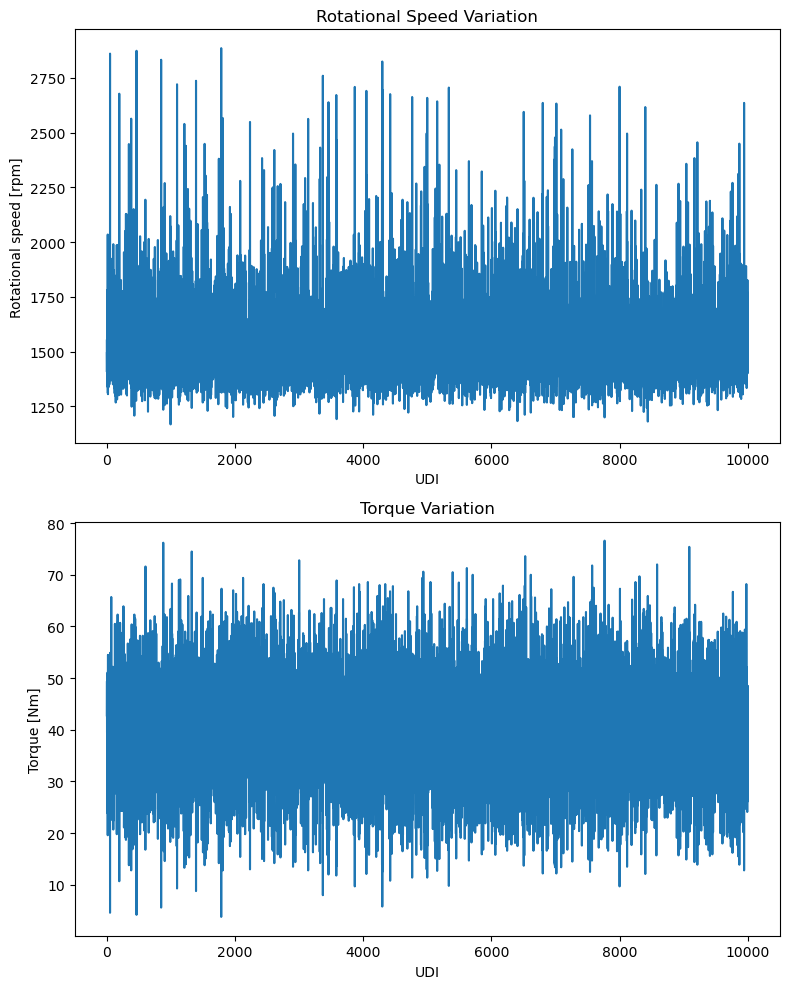

In [8]:
# Creating subplots for 'Rotational speed [rpm]' and 'Torque [Nm]'
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plotting 'Rotational speed [rpm]' against 'UDI'
axs[0].plot(dummy_df['UDI'], dummy_df['Rotational speed [rpm]'], linestyle='-', label='Rotational speed [rpm]')
axs[0].set_xlabel('UDI')
axs[0].set_ylabel('Rotational speed [rpm]')
axs[0].set_title('Rotational Speed Variation')

# Plotting 'Torque [Nm]' against 'UDI'
axs[1].plot(dummy_df['UDI'], dummy_df['Torque [Nm]'], linestyle='-', label='Torque [Nm]')
axs[1].set_xlabel('UDI')
axs[1].set_ylabel('Torque [Nm]')
axs[1].set_title('Torque Variation')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

plt.show()

# Predciting if the components will fail or not 

In [9]:
data = dummy_df.drop(columns='Failure Type').copy()
data.drop('Product ID', axis=1, inplace=True)

In [10]:
data.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M,298.1,308.6,1551,42.8,0,0
1,2,L,298.2,308.7,1408,46.3,3,0
2,3,L,298.1,308.5,1498,49.4,5,0
3,4,L,298.2,308.6,1433,39.5,7,0
4,5,L,298.2,308.7,1408,40.0,9,0


In [11]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [12]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

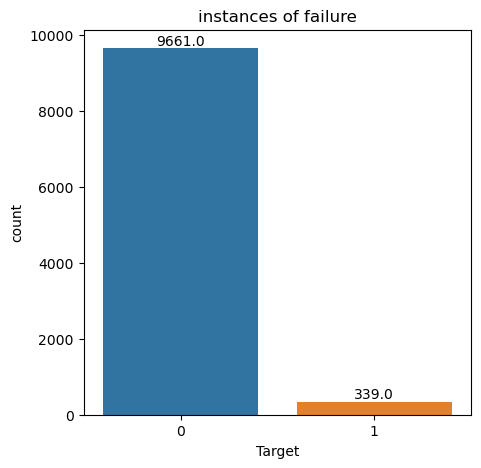

In [13]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x="Target", data=data)
plt.xlabel("Target")
plt.title("instances of failure")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

#0 means no failure and 1 means failure

In [14]:
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])


In [16]:
data['Type'].value_counts()

1    6000
2    2997
0    1003
Name: Type, dtype: int64

In [17]:
data.describe()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [18]:
feature_space = data.iloc[:, data.columns != 'Target']   #independent variables
feature_class = data.iloc[:, data.columns == 'Target']   #target variable


# x_train,    x_test,   y_train,    y_test
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)

In [19]:
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel() 

## Random forest classifier

In [20]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [21]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42) 

## OOB Rate

In [22]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 150  #minimum number of trees
max_estimators = 1000  #max number of trees

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [23]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 150 to 1000 trees)')

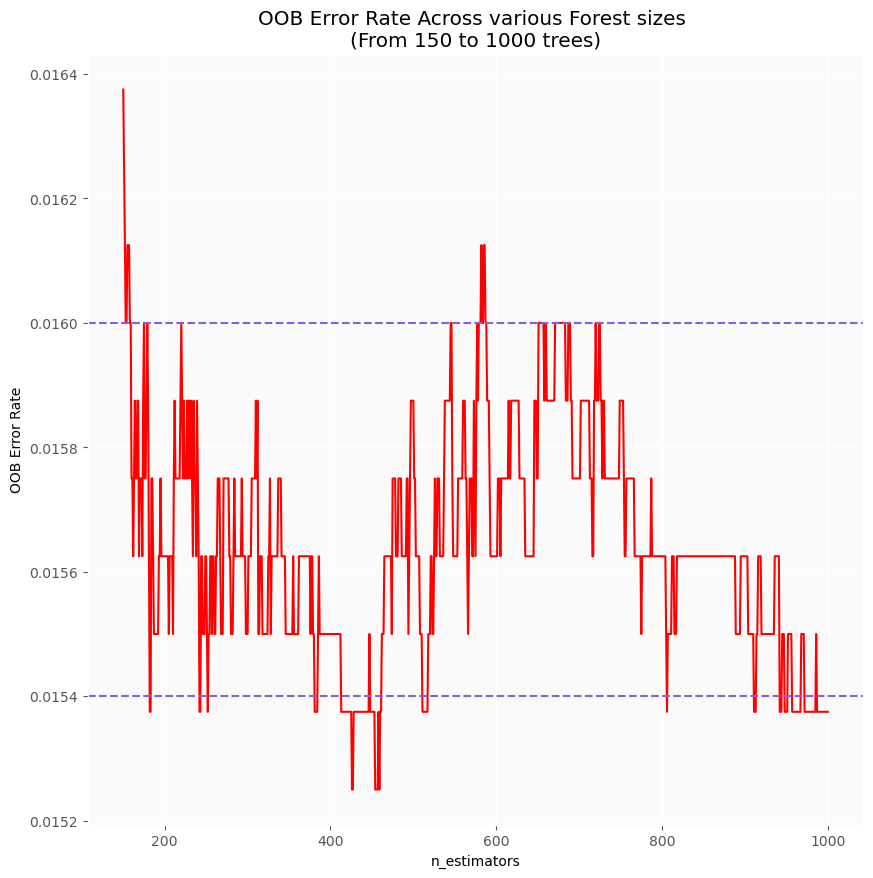

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.016, color='#875FDB',linestyle='--')
plt.axhline(0.0154, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 150 to 1000 trees)')

#850 trees taken

In [29]:
print('OOB Error rate for 850 trees is: {0:.5f}'.format(oob_series[850]))

OOB Error rate for 850 trees is: 0.01562


In [30]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=850,
                  bootstrap = True,
                  warm_start=False,   #it means we do not wanna start from one tree rather want start=15-20 trees for RFA
                  oob_score=False)   #in production we dont want to plot the oob graph

RandomForestClassifier(n_estimators=850, random_state=42)

## Hyper parameter optimization using gridsearch cv

In [32]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [3,4,5,6,7,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],  #on each tree
              'criterion': ['gini', 'entropy']              }

cv_rf = GridSearchCV(fit_rf, cv = 10,         #random forest object and cross validation 
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))  #is in seconds

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None}
Time taken in grid search:  2681.28


In [33]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 7)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=850, random_state=42)

In [34]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=850, random_state=42)

## Variable Importance

In [35]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [36]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [37]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [46]:
names_index = data.columns.tolist()

print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'Torque [Nm]' has a Mean Decrease in Impurity of 0.30999
2. The feature 'Rotational speed [rpm]' has a Mean Decrease in Impurity of 0.24708
3. The feature 'Tool wear [min]' has a Mean Decrease in Impurity of 0.19083
4. The feature 'UDI' has a Mean Decrease in Impurity of 0.10799
5. The feature 'Air temperature [K]' has a Mean Decrease in Impurity of 0.09572
6. The feature 'Process temperature [K]' has a Mean Decrease in Impurity of 0.03342
7. The feature 'Type' has a Mean Decrease in Impurity of 0.01496


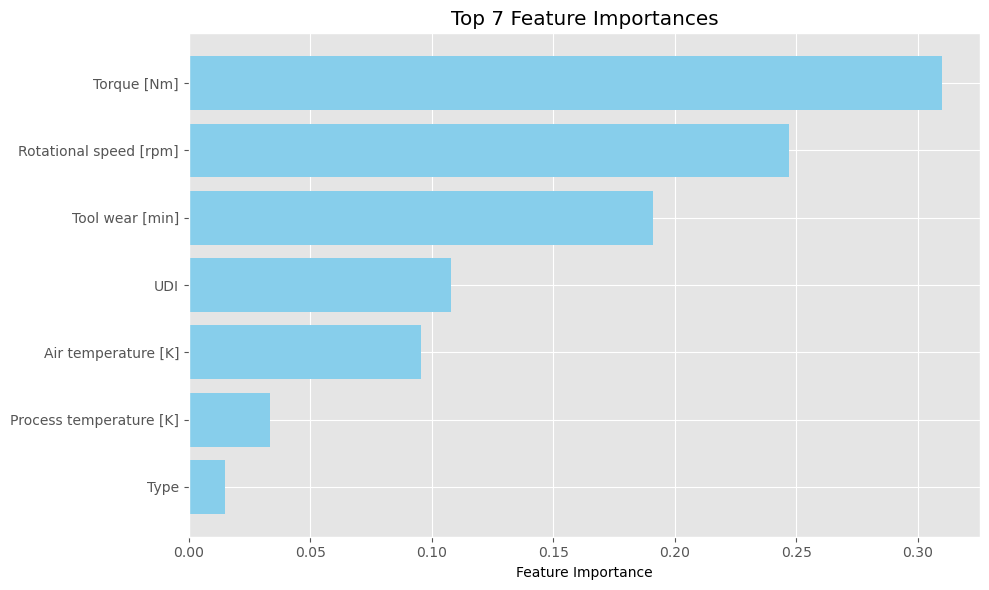

In [54]:
import matplotlib.pyplot as plt

# Ensure that the lengths of indices_rf and importances_rf match num_features_to_display
num_features_to_display = min(num_features_to_display, len(indices_rf))

indices_to_use = indices_rf[:num_features_to_display]
importances_to_use = importances_rf[indices_to_use]
features_names_to_use = [names_index[i] for i in indices_to_use]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_display), importances_to_use, align='center', color='skyblue')
plt.yticks(range(num_features_to_display), features_names_to_use)
plt.xlabel('Feature Importance')
plt.title('Top {} Feature Importances'.format(num_features_to_display))
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.tight_layout()

# Show the plot
plt.show()


## Predictions

In [55]:
predictions_rf = fit_rf.predict(test_set)

## Confusion Matrix

In [58]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

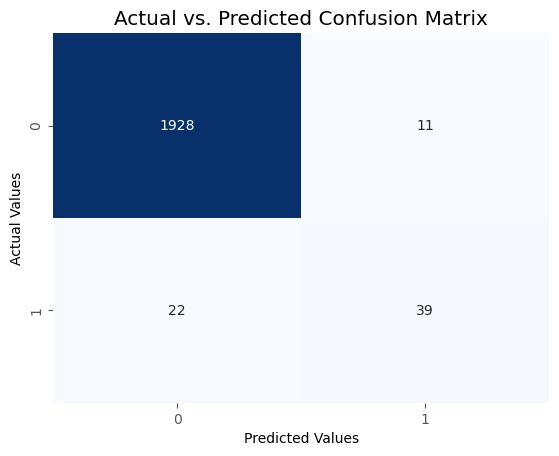

In [61]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Accuracy

In [62]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.984


In [63]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0165


## Area Under the curve

In [64]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,
                          predictions_prob,
                          pos_label = 1)

In [65]:
auc_rf = auc(fpr2, tpr2)

In [66]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\rijul\AppData\Local\Temp\ipykernel_22184\2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\rijul\AppData\Local\Temp\ipykernel_22184\2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


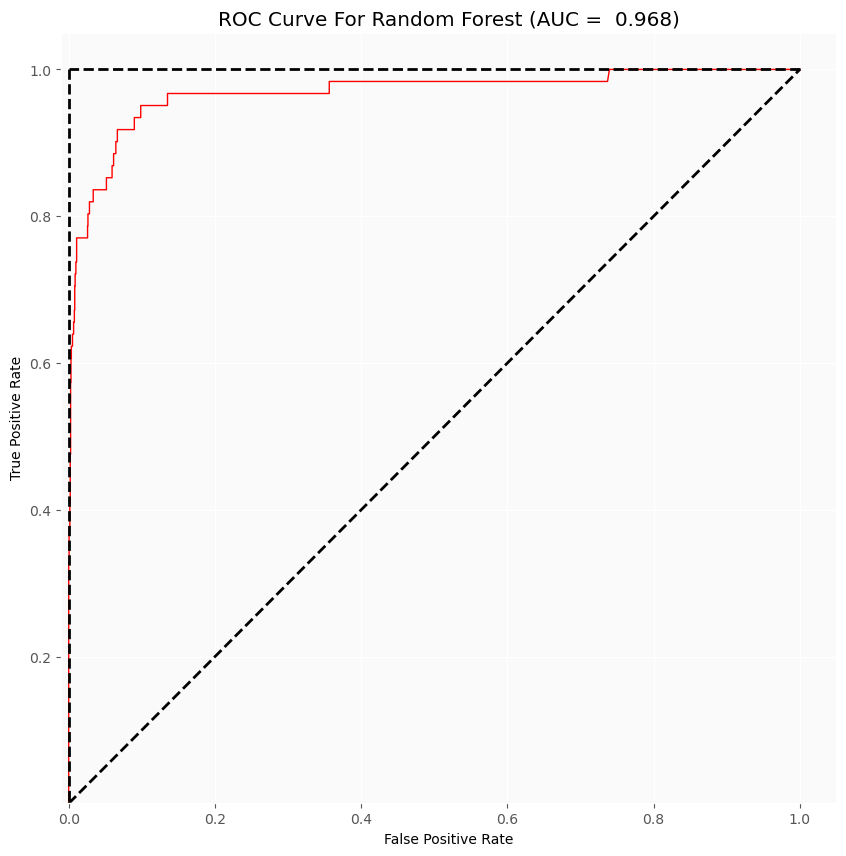

In [67]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Classification report

In [74]:
from sklearn.metrics import classification_report

# Assuming 'predictions_rf' contains the predicted values and 'test_class_set' contains the actual target values
# Replace these with your actual predicted and actual target values

# Print the classification report
print(classification_report(test_class_set, predictions_rf))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.78      0.64      0.70        61

    accuracy                           0.98      2000
   macro avg       0.88      0.82      0.85      2000
weighted avg       0.98      0.98      0.98      2000



# Multivariate analysis for type of failure

In [77]:
data2 = dummy_df.drop(columns='Target').copy()
data2.drop('Product ID', axis=1, inplace=True)

In [78]:
data2.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L,298.2,308.7,1408,40.0,9,No Failure


In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data2['Type'] = label_encoder.fit_transform(data2['Type'])
data2['Failure Type'] = label_encoder.fit_transform(data2['Failure Type'])

In [80]:
data2.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,2,298.1,308.6,1551,42.8,0,1
1,2,1,298.2,308.7,1408,46.3,3,1
2,3,1,298.1,308.5,1498,49.4,5,1
3,4,1,298.2,308.6,1433,39.5,7,1
4,5,1,298.2,308.7,1408,40.0,9,1


In [123]:
data2 = data2[(data2['Failure Type'] != 4) & (data2['Failure Type'] != 5)]
data2['Failure Type'].value_counts()

1    9652
0     112
3      95
2      78
Name: Failure Type, dtype: int64

In [124]:
dummy_df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [125]:
data2.describe()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
count,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000
mean,4999.405454,1.200060,300.002264,310.003482,1538.721043,39.993006,107.437557,1.015699
std,2889.103532,0.599943,2.000662,1.483394,179.245643,9.967446,63.363141,0.238999
min,1.000000,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2497.000000,1.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,1.000000
50%,4997.000000,1.000000,300.100000,310.100000,1503.000000,40.100000,107.000000,1.000000
75%,7502.000000,2.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,1.000000
max,10000.000000,2.000000,304.500000,313.800000,2886.000000,76.600000,251.000000,3.000000


In [126]:
feature_space = data2.iloc[:, data2.columns != 'Failure Type']   #independent variables
feature_class = data2.iloc[:, data2.columns == 'Failure Type']   #target variable


# x_train,    x_test,   y_train,    y_test
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 44)

In [127]:
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel() 

In [128]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=44) 

In [129]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=850,
                  bootstrap = True,
                  warm_start=False,   #it means we do not wanna start from one tree rather want start=15-20 trees for RFA
                  oob_score=False)   #in production we dont want to plot the oob graph

RandomForestClassifier(n_estimators=850, random_state=44)

In [130]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 7)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=850, random_state=44)

In [131]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=850, random_state=44)

In [132]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [133]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [134]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [135]:
names_index = data2.columns.tolist()

print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'Torque [Nm]' has a Mean Decrease in Impurity of 0.35102
2. The feature 'Rotational speed [rpm]' has a Mean Decrease in Impurity of 0.25991
3. The feature 'Tool wear [min]' has a Mean Decrease in Impurity of 0.13306
4. The feature 'Air temperature [K]' has a Mean Decrease in Impurity of 0.12310
5. The feature 'UDI' has a Mean Decrease in Impurity of 0.10816
6. The feature 'Process temperature [K]' has a Mean Decrease in Impurity of 0.01578
7. The feature 'Type' has a Mean Decrease in Impurity of 0.00897


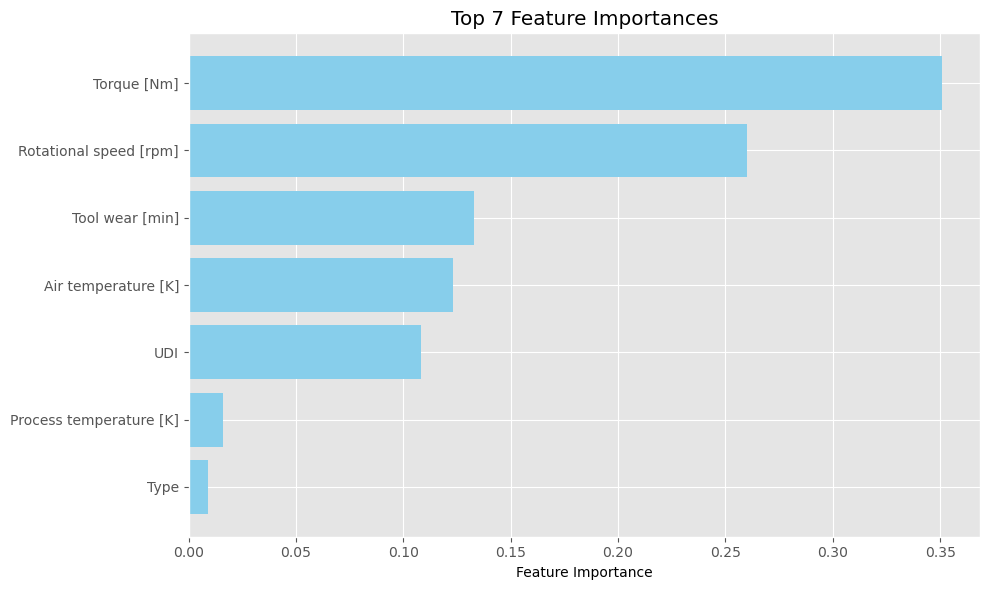

In [136]:
import matplotlib.pyplot as plt

# Ensure that the lengths of indices_rf and importances_rf match num_features_to_display
num_features_to_display = min(num_features_to_display, len(indices_rf))

indices_to_use = indices_rf[:num_features_to_display]
importances_to_use = importances_rf[indices_to_use]
features_names_to_use = [names_index[i] for i in indices_to_use]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_display), importances_to_use, align='center', color='skyblue')
plt.yticks(range(num_features_to_display), features_names_to_use)
plt.xlabel('Feature Importance')
plt.title('Top {} Feature Importances'.format(num_features_to_display))
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.tight_layout()

# Show the plot
plt.show()


In [137]:
predictions_rf = fit_rf.predict(test_set)

In [138]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

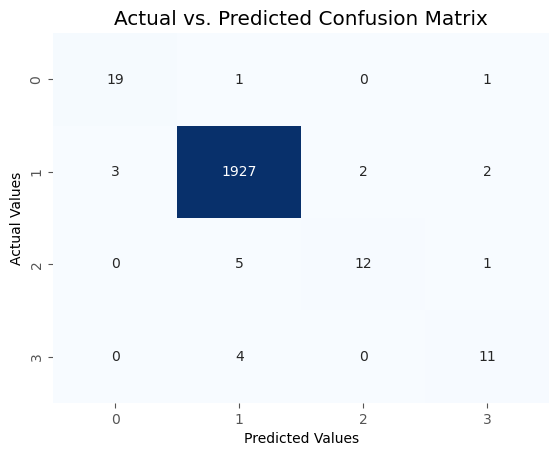

In [139]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [140]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.990


In [141]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0096


In [142]:
from sklearn.metrics import classification_report

# Assuming 'predictions_rf' contains the predicted values and 'test_class_set' contains the actual target values
# Replace these with your actual predicted and actual target values

# Print the classification report
print(classification_report(test_class_set, predictions_rf))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.99      1.00      1.00      1934
           2       0.86      0.67      0.75        18
           3       0.73      0.73      0.73        15

    accuracy                           0.99      1988
   macro avg       0.86      0.83      0.84      1988
weighted avg       0.99      0.99      0.99      1988

